In [2]:
import pandas as pd
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('annotation_1_test.csv')

In [4]:
df.tail(2)

,Абсолютный путь,Относительный путь,Имя классa
2009,/home/cossieman2000/WORK/python/dataset/polar ...,/python/dataset/polar bear/0986.jpg,polar bear
2010,/home/cossieman2000/WORK/python/dataset/polar ...,/python/dataset/polar bear/0987.jpg,polar bear


In [5]:
df.drop(['Относительный путь'], inplace = True, axis = 1)

In [6]:
df.tail(2)

,Абсолютный путь,Имя классa
2009,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear
2010,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear


In [7]:
df.rename(columns = {'Абсолютный путь': 'path', 'Имя классa': 'class_name'}, inplace = True)

In [8]:
df.tail(2)

,path,class_name
2009,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear
2010,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear


In [9]:
mask = (df.class_name == 'brown bear')

In [10]:
df['label'] = 0

In [11]:
df.loc[df['class_name'] == 'polar bear', 'label'] = 1

In [12]:
df

,path,class_name,label
0,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0
1,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0
2,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0
3,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0
4,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0
...,...,...,...
2006,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1
2007,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1
2008,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1
2009,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1


In [13]:
width_list = []
height_list = []
depth_list = []
df['width'] = 0
pictures = df['path'].values[:]
for picture in pictures:
    if os.path.exists(str(picture)):
        #print(picture) 
        #print(cv2.imread(picture).shape[1])
        pic = cv2.imread(picture)
        width_list.append(pic.shape[1])
        height_list.append(pic.shape[0])
        depth_list.append(pic.shape[2])


        

In [14]:
df['width'] = width_list
df['height'] = height_list
df['depth'] = depth_list
df

,path,class_name,label,width,height,depth
0,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,2048,1371,3
1,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,2560,1600,3
2,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,1920,1200,3
3,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,1920,1280,3
4,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,3867,2578,3
...,...,...,...,...,...,...
2006,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1600,900,3
2007,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1000,664,3
2008,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1400,1050,3
2009,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,2000,1333,3


In [15]:
df['mean_width'] = 0
df

,path,class_name,label,width,height,depth,mean_width
0,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,2048,1371,3,0
1,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,2560,1600,3,0
2,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,1920,1200,3,0
3,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,1920,1280,3,0
4,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,3867,2578,3,0
...,...,...,...,...,...,...,...
2006,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1600,900,3,0
2007,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1000,664,3,0
2008,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1400,1050,3,0
2009,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,2000,1333,3,0


In [16]:
df.loc[df['label'] == 1, 'mean_width'] = df.loc[df['label'] == 1, 'width'].mean()
df.loc[df['label'] == 0, 'mean_width'] = df.loc[df['label'] == 0, 'width'].mean()
df

,path,class_name,label,width,height,depth,mean_width
0,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,2048,1371,3,1830.909091
1,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,2560,1600,3,1830.909091
2,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,1920,1200,3,1830.909091
3,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,1920,1280,3,1830.909091
4,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,3867,2578,3,1830.909091
...,...,...,...,...,...,...,...
2006,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1600,900,3,1780.444332
2007,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1000,664,3,1780.444332
2008,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1400,1050,3,1780.444332
2009,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,2000,1333,3,1780.444332


In [17]:
df.loc[df['label'] == 1, 'mean_height'] = df.loc[df['label'] == 1, 'height'].mean()
df.loc[df['label'] == 0, 'mean_height'] = df.loc[df['label'] == 0, 'height'].mean()
df

,path,class_name,label,width,height,depth,mean_width,mean_height
0,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,2048,1371,3,1830.909091,1304.356794
1,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,2560,1600,3,1830.909091,1304.356794
2,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,1920,1200,3,1830.909091,1304.356794
3,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,1920,1280,3,1830.909091,1304.356794
4,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,3867,2578,3,1830.909091,1304.356794
...,...,...,...,...,...,...,...,...
2006,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1600,900,3,1780.444332,1231.538462
2007,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1000,664,3,1780.444332,1231.538462
2008,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1400,1050,3,1780.444332,1231.538462
2009,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,2000,1333,3,1780.444332,1231.538462


In [18]:
df.loc[df['label'] == 1, 'mean_depth'] = df.loc[df['label'] == 1, 'depth'].mean()
df.loc[df['label'] == 0, 'mean_depth'] = df.loc[df['label'] == 0, 'depth'].mean()
df

,path,class_name,label,width,height,depth,mean_width,mean_height,mean_depth
0,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,2048,1371,3,1830.909091,1304.356794,3.0
1,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,2560,1600,3,1830.909091,1304.356794,3.0
2,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,1920,1200,3,1830.909091,1304.356794,3.0
3,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,1920,1280,3,1830.909091,1304.356794,3.0
4,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,3867,2578,3,1830.909091,1304.356794,3.0
...,...,...,...,...,...,...,...,...,...
2006,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1600,900,3,1780.444332,1231.538462,3.0
2007,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1000,664,3,1780.444332,1231.538462,3.0
2008,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1400,1050,3,1780.444332,1231.538462,3.0
2009,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,2000,1333,3,1780.444332,1231.538462,3.0


In [19]:
type(df)

pandas.core.frame.DataFrame

In [128]:
def sort_label(df, label):
    new_df = df[df['label'] == label]
    new_df.index = range(new_df.shape[0])
    return new_df

In [129]:
def sort_size(df, max_width, max_height, label):
    new_df = df[((df['label'] == label) & (df['height'] <= max_height) & (df['width'] <= max_width))]
    new_df.index = range(new_df.shape[0])
    return new_df

In [22]:
df['pixels'] = df['width'] * df['height'] * df['depth']
max_pixels = df['pixels'].max()
min_pixels = df['pixels'].min()
mean_pixels = df['pixels'].mean()
print(max_pixels)
print(min_pixels)
print(mean_pixels)
df

146546688
180000
9076884.013426157


,path,class_name,label,width,height,depth,mean_width,mean_height,mean_depth,pixels
0,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,2048,1371,3,1830.909091,1304.356794,3.0,8423424
1,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,2560,1600,3,1830.909091,1304.356794,3.0,12288000
2,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,1920,1200,3,1830.909091,1304.356794,3.0,6912000
3,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,1920,1280,3,1830.909091,1304.356794,3.0,7372800
4,/home/cossieman2000/WORK/python/dataset/brown ...,brown bear,0,3867,2578,3,1830.909091,1304.356794,3.0,29907378
...,...,...,...,...,...,...,...,...,...,...
2006,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1600,900,3,1780.444332,1231.538462,3.0,4320000
2007,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1000,664,3,1780.444332,1231.538462,3.0,1992000
2008,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,1400,1050,3,1780.444332,1231.538462,3.0,4410000
2009,/home/cossieman2000/WORK/python/dataset/polar ...,polar bear,1,2000,1333,3,1780.444332,1231.538462,3.0,7998000


In [123]:
def gistogramm(df, label):
#picture = (df[df['label'] == label].sample())['path']
    colors = list(range(3))
    picture = (df[df['label'] == label].sample())['path'].values
    print(picture[0])
    image = cv2.imread(str(picture[0]))
    color = ('b', 'g', 'r')
    #fig, ax = plt.subplots()
    j = 0
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        colors[j] = histr
        j += 1
        #ax.plot(histr)
       # plt.xlim([0, 256])
    #ax.set_xlabel('интенсивность')
    #ax.set_ylabel('количество пикселей')
    #plt.show()
    return colors[0], colors[1], colors[2]



/home/cossieman2000/WORK/python/dataset/polar bear/0759.jpg


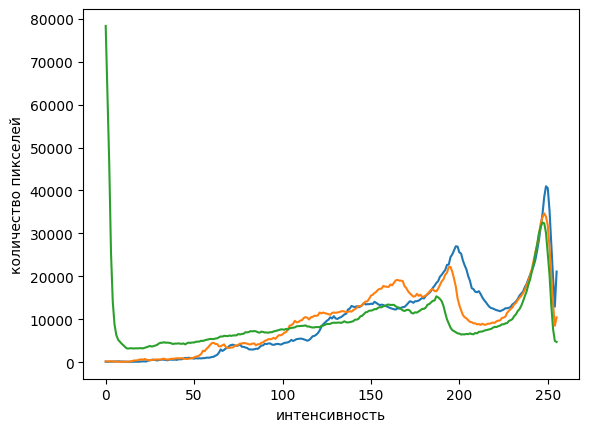

In [131]:
b, g, r = gistogramm(df, 1)
fig, ax = plt.subplots()
ax.plot(b)
ax.plot(g)
ax.plot(r)
ax.set_xlabel('интенсивность')
ax.set_ylabel('количество пикселей')
plt.show()
